# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-0.91828513, -0.79314298],
        [ 0.93897544,  1.26373728],
        [ 0.85211004, -1.14140521],
        [ 0.89577042,  1.68856209],
        [ 0.78921102,  0.18491755]]),
 array([0, 1, 0, 1, 1]))

In [13]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [14]:
# sampling
Y_generative = np.concatenate((np.zeros(500), np.ones(500)))
X_generative = np.concatenate((np.random.multivariate_normal(m1, sigma, 500), np.random.multivariate_normal(m2, sigma, 500)))

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [15]:
# computing beta_0 and beta using the formulas
beta0 = np.log(1) + (m2.T @ np.linalg.inv(sigma) @ m2)/2 - (m1.T @ np.linalg.inv(sigma) @ m1)/2
beta = np.linalg.inv(sigma) @ (m1 - m2)
beta0, beta

(-2.0, array([2., 2.]))

In [17]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([2.13416541]), array([[-2.24763272, -2.19700176]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [23]:
# sampling
n = 1000
p1 = np.random.binomial(1, 0.5,n)
sample = []
for i in range(n):
    if p1[i] == 0:
        sample.append(np.random.multivariate_normal(m1, sigma, 1))
    else:
        sample.append(np.random.multivariate_normal(m2, sigma, 1))
X_disciminative = np.array(sample).reshape(n,2)
beta0 = -2
beta = np.array([2,2])
p = 1/(1 + np.exp(-beta0 - X_disciminative @ beta))
Y_discriminative = np.random.binomial(1, p).flatten()

In [24]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.91571543]), array([[1.76925098, 1.80670186]]))

#### Second bullet point

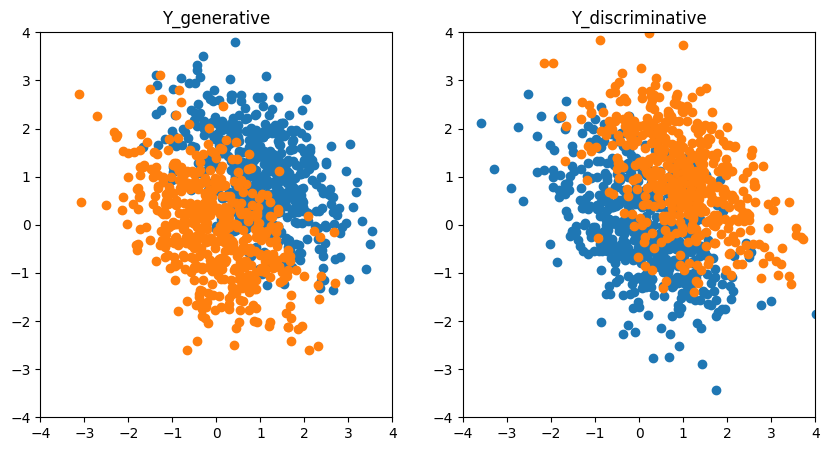

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_generative[Y_generative == 0, 0], X_generative[Y_generative == 0, 1])
ax[0].scatter(X_generative[Y_generative == 1, 0], X_generative[Y_generative == 1, 1])
ax[0].set_title('Y_generative')
ax[0].set_xlim([-4, 4])
ax[0].set_ylim([-4, 4])
ax[1].scatter(X_disciminative[Y_discriminative == 0, 0], X_disciminative[Y_discriminative == 0, 1])
ax[1].scatter(X_disciminative[Y_discriminative == 1, 0], X_disciminative[Y_discriminative == 1, 1])
ax[1].set_title('Y_discriminative')
ax[1].set_xlim([-4, 4])
ax[1].set_ylim([-4, 4])
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [5]:
# sampling

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 2000
x2 = np.random.exponential(1/2, size=n2)
X = np.concatenate((x1, x2))
y = np.concatenate((np.ones(n1), np.zeros(n2)))

In [6]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X.reshape(-1,1), y)
(mod.intercept_, mod.coef_)

(array([-1.3795859]), array([[0.98300485]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

Solution:

$$p(x|y=-1) = \frac{\pi\cdot\exp(-x)}{\exp(\beta_0 + \beta_1 x)(1-\pi)} = C_{\beta_0,\pi}\exp(-(\beta_1+ 1)x)$$
$$C_{\beta_0,\pi} = \frac{\pi\cdot\exp(-x)}{\exp(\beta_0 + \beta_1 x)(1-\pi)\exp(-\beta_1 x - x)} = \frac{\pi\cdot\exp(-x)}{\exp(\beta_0 -x)(1-\pi)} = \frac{\pi}{\exp(\beta_0 )(1-\pi)}$$
$$C_{\beta_0,\pi} = \frac{\pi}{\exp(\beta_0 )(1-\pi)} = \beta_1 + 1$$
$$\beta_0 = \log(\frac{\pi}{(\beta_1 + 1)(1 - \pi)})$$

In [9]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = np.log(pi_c/((1 - pi_c)*(1 + beta1)))
beta0

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)